In [ ]:
import os
import math
import imageio
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io, color
from sklearn.cluster import KMeans
from scipy.linalg import dft
from scipy.linalg import circulant
from numpy.linalg import matrix_rank
import numpy.linalg as linalg
from sklearn.utils import shuffle
from matplotlib.pyplot import figure

parameters:

In [ ]:
N = 64
c = 0.6
num_of_signals = 10000

In [ ]:
def Phi_gen(N, c):
  # L and M are gaussian with certain constraints:
  L=np.random.normal(scale=np.sqrt(N/2*(1-c)))
  M=np.random.normal(scale=np.sqrt(c))
  # K is uniform of range [1,N/2]:
  K=np.random.randint(low=1, high=N//2+1)
  # init Phi:
  Phi=np.ones((N))*M
  # insert (M+L) in 2 K-random indexes:
  Phi[K-1] += L
  Phi[K+N//2-1] += L
  return Phi

def signals_gen(N, c, num_of_signals = 100):
  signals = []
  for i in range(num_of_signals):
    signals += [Phi_gen(N,c)]
  # turn the returned signals into a matrix:
  samples = np.array(signals)
  return samples

Question 1.a

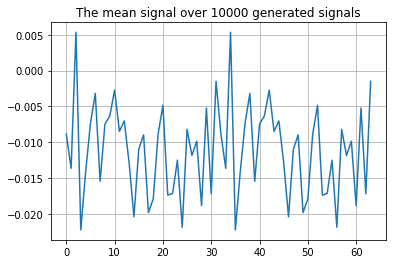

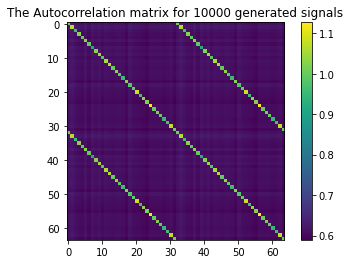

In [ ]:
signals = signals_gen(N, c, num_of_signals)
mean=np.mean(signals, axis=0)
plt.plot(mean)
plt.title(f"The mean signal over {num_of_signals} generated signals")
plt.grid()
plt.show()

autocorrelation_matrix = signals.T@signals/num_of_signals

_ = plt.imshow(autocorrelation_matrix)
_ = plt.title(f"The Autocorrelation matrix for {num_of_signals} generated signals")
plt.colorbar()

Question 1.b

constructing the Wiener Filter

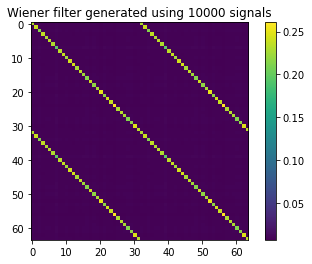

In [ ]:
W = autocorrelation_matrix@np.linalg.inv(autocorrelation_matrix+np.eye(N))
plt.imshow(W)
_ = plt.title(f"Wiener filter generated using {num_of_signals} signals")
plt.colorbar()

generating noise as requested, degrading the signal, and reconstracting the signal using Wiener filter

In [ ]:
noise_matrix = np.random.normal(size=signals.shape)
degraded_signal = signals + noise_matrix
reconstructed_signal = (W@degraded_signal.T).T

comparing the use of Wiener filter for different sizes of generated signals

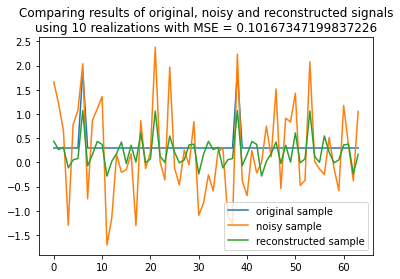

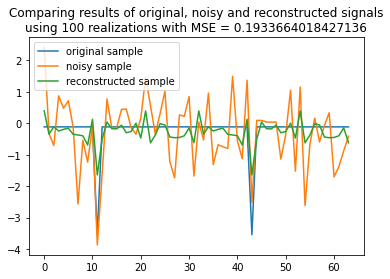

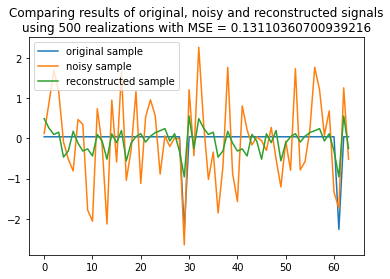

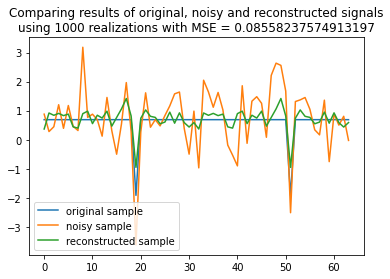

In [ ]:
for i in [10, 100, 500, 1000]:
  orig_signal = signals[i,:]
  noisy_signal = degraded_signal[i,:]
  recon_signal= reconstructed_signal[i,:]

  orig_plot, = plt.plot(orig_signal,label="original sample")
  noisy_plot, = plt.plot(noisy_signal,label="noisy sample")
  reconstructed_plot, = plt.plot(recon_signal,label="reconstructed sample")

  MSE = np.mean((recon_signal-orig_signal)**2)

  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title(f"Comparing results of original, noisy and reconstructed signals\nusing {i} realizations with MSE = {MSE}")
  _ = plt.show()

In [ ]:
mean_MSE = np.mean((reconstructed_signal-signals)**2)
print(f"The average MSE for all signals is: {mean_MSE}")

The average MSE for all signals is: 0.2314941228671783


Question 1.c

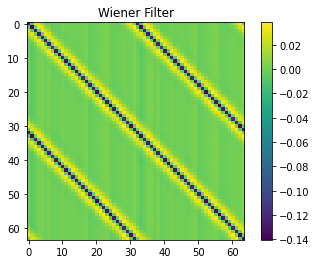

In [96]:
def circulant_gen(N, circ_values):
  circ_col = np.zeros(N)
  circ_col[0] = circ_values['0']
  circ_col[1] = circ_values['1']
  circ_col[2] = circ_values['2']
  circ_col[-1] = circ_values['-1']
  circ_col[-2] = circ_values['-2']
  return circulant(circ_col)

circ_values = {'0': -5/2, '1': 4/3, '2': -1/12, '-1': 4/3, '-2': -1/12}
H = circulant_gen(N, circ_values)
W = (autocorrelation_matrix@H.T)@np.linalg.inv((H@autocorrelation_matrix@H.T)+np.eye(N))
plt.imshow(W)
_ = plt.title("Wiener Filter")
plt.colorbar()

In [ ]:
noise_matrix = np.random.normal(size=signals.shape)
degraded_signal = signals@H.T + noise_matrix
reconstructed_signal = (W@degraded_signal.T).T

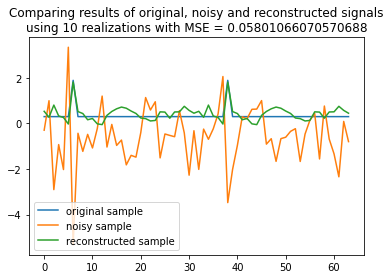

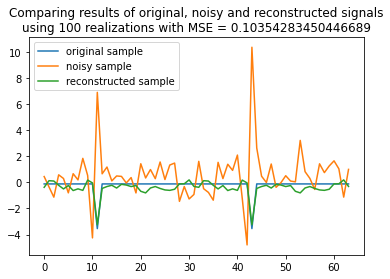

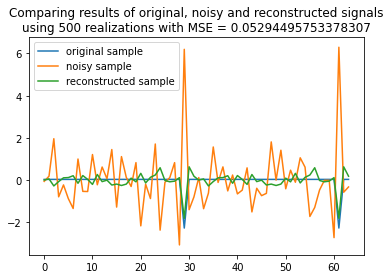

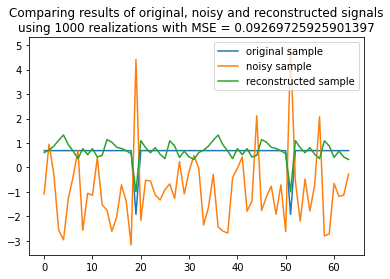

In [ ]:
for i in [10, 100, 500, 1000]:
  orig_signal = signals[i,:]
  noisy_signal = degraded_signal[i,:]
  recon_signal= reconstructed_signal[i,:]

  orig_plot, = plt.plot(orig_signal,label="original sample")
  noisy_plot, = plt.plot(noisy_signal,label="noisy sample")
  reconstructed_plot, = plt.plot(recon_signal,label="reconstructed sample")

  MSE = np.mean((recon_signal-orig_signal)**2)

  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title(f"Comparing results of original, noisy and reconstructed signals\nusing {i} realizations with MSE = {MSE}")
  _ = plt.show()

In [ ]:
mean_MSE = np.mean((reconstructed_signal-signals)**2)
print(f"The average MSE for all signals is: {mean_MSE}")

The average MSE for all signals is: 0.07755749243852317


Question 1.d

not using H to calculate W

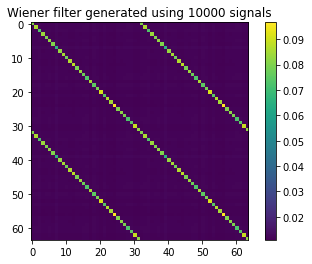

In [ ]:
W = autocorrelation_matrix@np.linalg.inv(autocorrelation_matrix+5*np.eye(N))
plt.imshow(W)
_ = plt.title(f"Wiener filter generated using {num_of_signals} signals")
plt.colorbar()

In [ ]:
noise_matrix = np.random.normal(size=signals.shape)
degraded_signal = signals + noise_matrix
reconstructed_signal = (W@degraded_signal.T).T

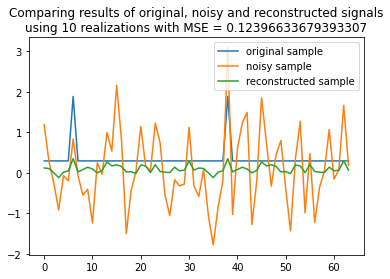

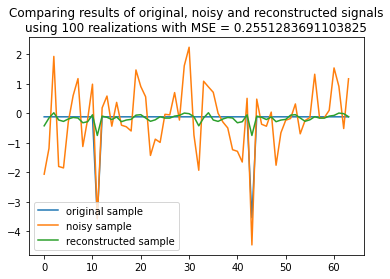

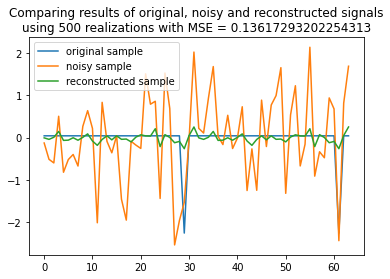

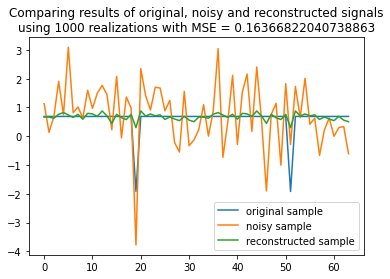

In [ ]:
for i in [10, 100, 500, 1000]:
  orig_signal = signals[i,:]
  noisy_signal = degraded_signal[i,:]
  recon_signal= reconstructed_signal[i,:]

  orig_plot, = plt.plot(orig_signal,label="original sample")
  noisy_plot, = plt.plot(noisy_signal,label="noisy sample")
  reconstructed_plot, = plt.plot(recon_signal,label="reconstructed sample")

  MSE = np.mean((recon_signal-orig_signal)**2)

  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title(f"Comparing results of original, noisy and reconstructed signals\nusing {i} realizations with MSE = {MSE}")
  _ = plt.show()

In [ ]:
mean_MSE = np.mean((reconstructed_signal-signals)**2)
print(f"The average MSE for all signals is: {mean_MSE}")

The average MSE for all signals is: 0.3197041069074448


using H to calculate W

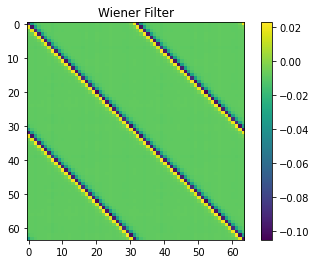

In [68]:
W = (autocorrelation_matrix@H.T)@np.linalg.inv((H@autocorrelation_matrix@H.T)+5*np.eye(N))
plt.imshow(W)
_ = plt.title("Wiener Filter")
plt.colorbar()

In [69]:
noise_matrix = np.random.normal(size=signals.shape)
degraded_signal = signals@H.T + noise_matrix
reconstructed_signal = (W@degraded_signal.T).T

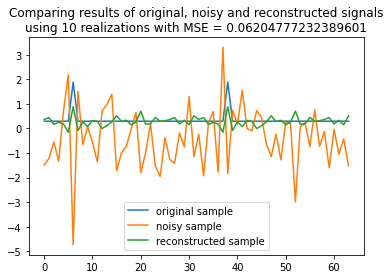

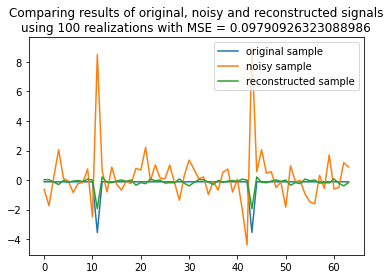

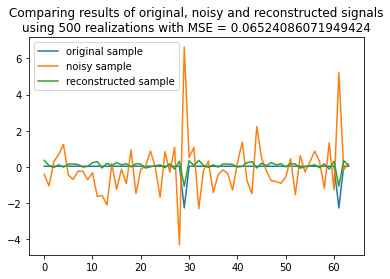

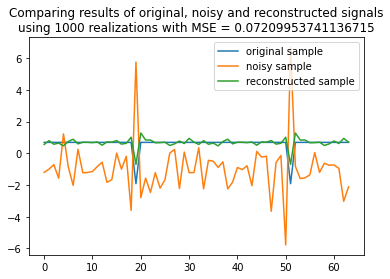

In [70]:
for i in [10, 100, 500, 1000]:
  orig_signal = signals[i,:]
  noisy_signal = degraded_signal[i,:]
  recon_signal= reconstructed_signal[i,:]

  orig_plot, = plt.plot(orig_signal,label="original sample")
  noisy_plot, = plt.plot(noisy_signal,label="noisy sample")
  reconstructed_plot, = plt.plot(recon_signal,label="reconstructed sample")

  MSE = np.mean((recon_signal-orig_signal)**2)

  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title(f"Comparing results of original, noisy and reconstructed signals\nusing {i} realizations with MSE = {MSE}")
  _ = plt.show()

In [72]:
mean_MSE = np.mean((reconstructed_signal-signals)**2)
print(f"The average MSE for all signals is: {mean_MSE}")

The average MSE for all signals is: 0.12699693431585643


Question 1.e

calculate pseudo inverse of H

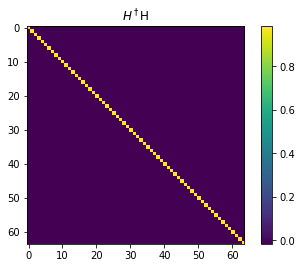

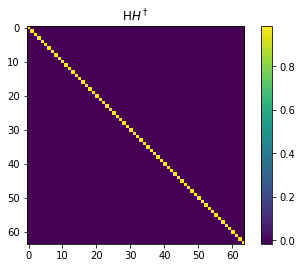

In [99]:
H_pseudo_inverse = linalg.pinv(H)

plt.imshow(H_pseudo_inverse@H)
plt.title("$H^\dagger$H")
plt.colorbar()
plt.show()

plt.imshow(H@H_pseudo_inverse)
plt.title("H$H^\dagger$")
plt.colorbar()
plt.show()

the matrices approxiamte values

In [102]:
print(np.min(np.abs(H_pseudo_inverse@H)))
print(np.max(np.abs(H_pseudo_inverse@H)))

0.015624999999969894
0.9843750000000288


the smallest eigen value

In [98]:
np.min(np.abs(np.linalg.eig(H)[0]))

1.3451094587552017e-15

the next smallest eigen value

In [103]:
sorted(np.abs(np.linalg.eig(H)[0]))[1]

0.009638275608012493

In [106]:
Phi1 = np.ones(N)*100
H_p_Phi1 = H_pseudo_inverse@Phi1

Phi2 = np.zeros(N)
H_p_phi2 = H_pseudo_inverse@Phi2

calculate the differnce (L2) of both Phi's and pseudo inverse(H)*Phi

In [107]:
Phi_diff = np.sqrt((Phi1-Phi2)@(Phi1-Phi2))
print(Phi_diff)
H_p_Phi_diff = np.sqrt((H_p_Phi1-H_p_phi2)@(H_p_Phi1-H_p_phi2))
print(H_p_Phi_diff)

800.0
1.1088922173392244e-08


plotting the graphs of: Phi1, Phi2, Phi1-Phi2, H_p_phi1-H_p_phi2, H_p_phi2, H_p_phi1

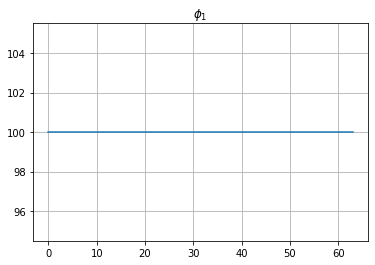

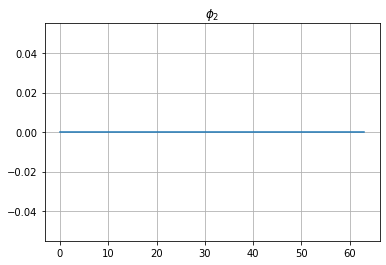

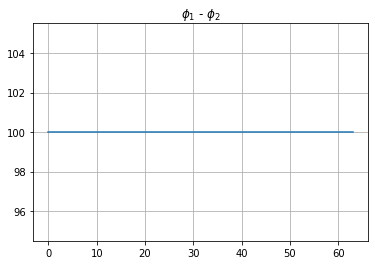

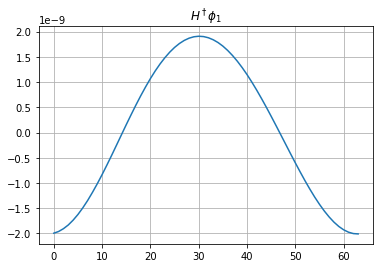

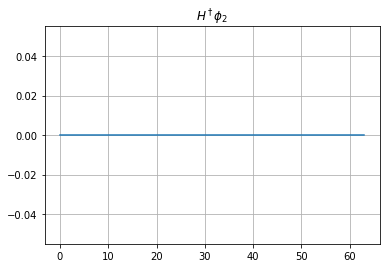

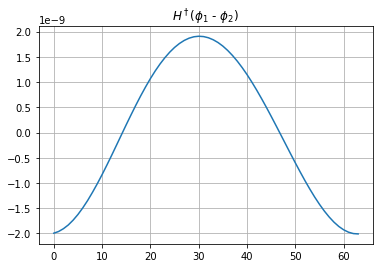

In [115]:
plt.plot(Phi1) 
plt.title("$\phi_1$")
plt.grid()
plt.show()

plt.plot(Phi2) 
plt.title("$\phi_2$")
plt.grid()
plt.show()

plt.plot(Phi1 - Phi2) 
plt.title("$\phi_1$ - $\phi_2$")
plt.grid()
plt.show()

plt.plot(H_p_Phi1) 
plt.title("$H^\dagger \phi_1$")
plt.grid()
plt.show()

plt.plot(H_p_phi2) 
plt.title("$H^\dagger \phi_2$")
plt.grid()
plt.show()

plt.plot(H_p_Phi1 - H_p_phi2) 
plt.title("$H^\dagger$($\phi_1$ - $\phi_2$)")
plt.grid()
plt.show()